In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
n= 100
A = np.zeros((n,n))
b=A.ravel()
b[0::n+1] = 2
b[n::n+1] = -1
b[1::n+1] = -1
print(A)
llamb=[]
llamb2=[]
kk=[]
ras=[]
mm=[]
rass=[]
def itera(A,eps):
    n = A.shape[0]
    I = np.eye(n)
    u = np.random.randn(n)
    v = np.random.randn(n)
    k = 0 
    m = 0
    t = 0
    ch = True
    che = True 
    while ch:
        k += 1
        kk.append(k)
        lamb = np.dot(np.dot(A, u), u) / np.dot(u, u)
        u = np.dot(A, u)
        u /= np.linalg.norm(u)
        llamb.append(lamb)
        error = lamb-t
        ras.append(abs(error))
        if abs(error)<eps:
            ch= False
        t = lamb
    t=0
    while che:
        m += 1 
        mm.append(m)
        v =  np.dot(I,v)- np.dot(u,np.dot(u,v))
        B = A -lamb * np.dot(u, np.dot(u, v))
        lamb2 = np.dot(np.dot(B, v), v) / np.dot(v, v) 
        llamb2.append(lamb2)
        v = np.dot(B,v)
        v /= np.linalg.norm(v)
        erro=lamb2-t
        rass.append(erro)
        if erro<eps:
            che= False
        t = lamb2
    return (lamb, lamb2)
        
(lamb, lamb2) = itera(A,10**(-6)) 
print('max lambda:',lamb, 'second-largest:',  lamb2)
        



[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]
max lambda: 3.998248525471242 second-largest: 3.996481294884126


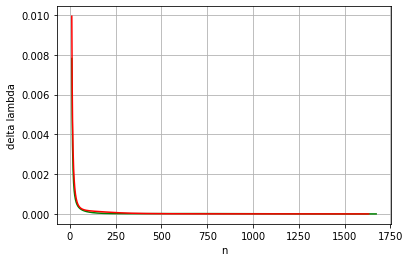

In [3]:
plt.plot(kk[10:],ras[10:],'g')
plt.plot(mm[10:],rass[10:],'r')
plt.xlabel('n')
plt.ylabel('delta lambda')
plt.grid()
plt.show()

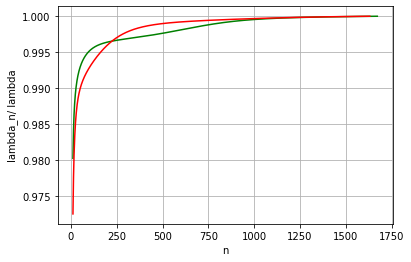

In [4]:
plt.plot(kk[10:],llamb[10:]/lamb,'g')
plt.plot(mm[10:],llamb2[10:]/lamb2,'r')
plt.xlabel('n')
plt.ylabel('lambda_n/ lambda')
plt.grid()
plt.show()

In [9]:
llamb=[]
llamb2=[]
kk=[]
ras=[]
mm=[]
rass=[]
D = A - np.eye(n)*(lamb)
lamb3 = itera(D,10**(-6))[0]
print('min lambda:',lamb3+lamb)


min lambda: 0.0013894108453862408


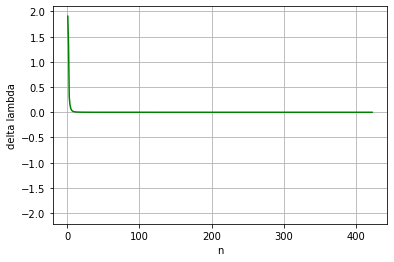

In [10]:
plt.plot(kk,ras,'g')
plt.plot(mm,rass,'r')
plt.xlabel('n')
plt.ylabel('delta lambda')
plt.grid()
plt.show()

In [7]:
min(np.linalg.eigvals(A))

0.0009674354160258218

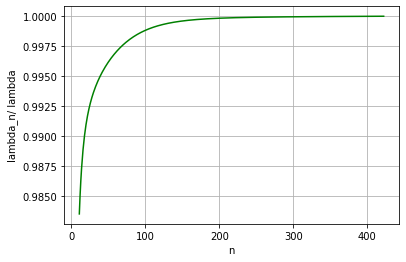

In [11]:
plt.plot(kk[10:],llamb[10:]/lamb3,'g')
plt.xlabel('n')
plt.ylabel('lambda_n/ lambda')
plt.grid()
plt.show()